## Problem Statement 

I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman. 

Dataset 

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy. 

#### Description of Variables 

The dataset contains 6366 observations of 9 variables: 

1. rate_marriage: woman's rating of her marriage (1 = very poor, 5 =  very good) 
2. age: woman's age 
3. yrs_married: number of years married 
3. children: number of children 
4. religious: woman's rating of how religious she is (1 = not religious, 4 =  strongly religious) 
5. educ: level of education (9 = grade school, 12 = high school, 14 =  some college, 16 = college graduate, 17 = some graduate school, 20  = advanced degree)
6. occupation: woman's occupation (1 = student, 2 = farming/semi skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =  professional with advanced degree) 
7. occupation_husb: husband's occupation (same coding as above) 
8. affairs: time spent in extra-marital affairs 

In [9]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

In [12]:
affairdata = sm.datasets.fair.load_pandas().data
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


As our objective is to classify the women whether they have affair or not.
so it becomes a classification problem.

hence we need to add an column where the no. of affairs is greater than 1 that woman has an affair.

In [13]:
#add "affair" column: 1 represents having affairs, 0  represents not 
affairdata['affair']=(affairdata.affairs>0).astype(int)
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


Also we can now drop the 'affairs'.

In [15]:
affairdata = affairdata.drop(columns=['affairs'])
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


## Data Preprocessing 
1. handling missing values
2. handling categorical data - No categorical data is present.

In [16]:
# handling missing values
affairdata.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64

no null values.

##  Correlation Heatmap

<AxesSubplot:>

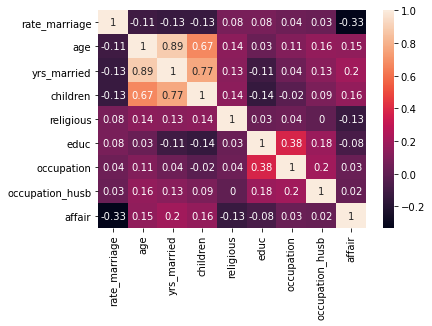

In [19]:
import seaborn as sns
corr_mat = affairdata.corr().round(2)
sns.heatmap(data = corr_mat,annot= True)

Observe the last row , no feature is highly correleted with the target column.

## Splitting the data

In [30]:
X = affairdata.drop(columns=['affair'])
Y = affairdata.affair

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Training the model

In [32]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1172  131]
 [ 381  226]]


0.7319371727748691

Now let's try feature scaling and see if it improves the accuracy.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

classifier2 = LogisticRegression()
classifier2.fit(x_train_scaled, y_train)

y_pred2 = classifier2.predict(x_test_scaled)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[1172  131]
 [ 381  226]]


0.7319371727748691

Looks like feature scaling did't help

In [41]:
## K-fold cross validation
score = cross_val_score(classifier, X, Y, scoring='accuracy', cv = 10)
print(score)
print(score.mean())

[0.71585557 0.70015699 0.74568289 0.71271586 0.70172684 0.73155416
 0.71855346 0.69968553 0.74685535 0.75943396]
0.72322206095791
